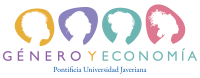



## **Sesión 3:  Nociones básicas de la Gran Encuesta Integrada de Hogares (GEIH) y   Uso de datos de la GEIH referentes a cuidado**
---
Autor: Linda Nataly Corredor Martínez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
*  Repaso de estructuras de control y librería Pandas.
1. El método merge de Pandas.
2. Construcción de base de datos de un mes en GEIH.
3. Limpieza de datos.
4. Creación de variables de Cuidado.
5. Estadísticas descriptivo.

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html  , en la sección Módulo 3.

## **Importando Librerías**



In [1]:
import glob           # Para utilizar patrones de búsqueda de archivos
import os             # Para interactuar con el sistema operativo
import pandas as pd   # Para el manejo de datos en DataFrames

## **Método Merge en la librería: Pandas**
El método `merge` en pandas es una función que permite combinar dos DataFrames. Permite combinar datos en función de una o más claves comunes entre los DataFrames, facilitando la integración y análisis de datos procedentes de diferentes fuentes.

**Sintaxis**

`pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False)`

**Parámetros:**
* `right`: Este parámetro toma el DataFrame que se va a combinar con el DataFrame de la izquierda.

* `how`: Este parámetro especifica el tipo de combinación que se va a realizar, default ‘inner’. Los valores posibles son:
    1. `'left'`: Usa solo las claves del DataFrame de la izquierda.
    2. `'right'`: Usa solo las claves del DataFrame de la derecha.
    3. `'outer'`: Usa las claves de ambos DataFrames.
    4. `'inner'`: Usa solo las claves que están en ambos DataFrames (intersección).

* `on`: Lista o string que especifica el nombre de las columnas comunes en las que se va a realizar la combinación. Si no se especifica, y tanto left_on como right_on son None, entonces se intentará realizar la combinación en las columnas con nombres comunes.

* `suffixes`: Tupla de strings que se utiliza para añadir sufijos a las columnas con nombres duplicados en los DataFrames combinados. Por defecto es ('_x', '_y').

* `validate`: Se utiliza para validar el tipo de combinación que se está realizando entre los DataFrames. Esto es útil para asegurarse de que la combinación se realiza según lo esperado y para evitar errores o combinaciones inesperadas en los datos.
    1. `'one_to_one'`: Verifica que el merge es de uno a uno. Esto significa que cada valor en la clave de combinación en el DataFrame izquierdo corresponde a exactamente un valor en la clave de combinación en el DataFrame derecho.

    2. `'one_to_many'`: Verifica que el merge es de uno a muchos. Esto significa que cada valor en la clave de combinación en el DataFrame izquierdo corresponde a uno o más valores en la clave de combinación en el DataFrame derecho.

    3. `'many_to_one'`: Verifica que el merge es de muchos a uno. Esto significa que cada valor en la clave de combinación en el DataFrame derecho corresponde a uno o más valores en la clave de combinación en el DataFrame izquierdo.
    4. `'many_to_many'`: Verifica que el merge es de muchos a muchos. Esto significa que varios valores en la clave de combinación en el DataFrame izquierdo pueden corresponder a varios valores en la clave de combinación en el DataFrame derecho.




---

**Ejemplo:**

Se tienen dos conjuntos de datos. El primer conjunto de datos tiene la identificación,  los nombres y las direcciones de los clientes de cierta tienda de cadena. El segundo conjunto de datos está con las compras realizadas por estos clientes. Como podemos ver, en este ejemplo, cada cliente tiene un id asociado. Usaremos este id para fusionar ambos DataFrames.

---



In [2]:
# Dataframe de clientes
clientes = pd.DataFrame({
    'id': [1, 2, 3],
    'nombre': ['Juan', 'María', 'Ana'],
    'direccion': ['Calle A', 'Calle B', 'Calle C']
})

# Esta función DataFrame.head(n) devuelve las primeras n filas del Dataframe según la posición.
clientes.head()

,id,nombre,direccion
0,1,Juan,Calle A
1,2,María,Calle B
2,3,Ana,Calle C


In [3]:
# Dataframe de compras
compras = pd.DataFrame({
    'id': [1, 2, 4],
    'compra': ['Laptop', 'Teléfono', 'Tablet'],
    'valor_compra': [1260000, 850000, 1500000]
})

# Esta función DataFrame.head(n) devuelve las primeras n filas del Dataframe según la posición.
compras.head()

,id,compra,valor_compra
0,1,Laptop,1260000
1,2,Teléfono,850000
2,4,Tablet,1500000


En Pandas se tienen cuatro posibilidades para obtener un Dataframe final. Estas posibilidades se especifican a partir de parámetro `how`.

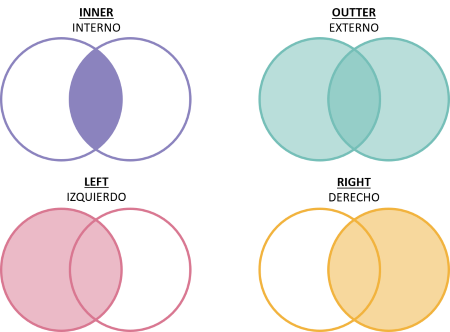

**Unión interna (INNER)**

Devuelve solo las filas con valores coincidentes en ambas tablas. Es el tipo de unión más común y la predeterminada para el método de `pandas.DataFrame.merge`.

In [4]:
#Dataframe 1: Unión interna
compras_clientes_inner = pd.merge(clientes, compras, on='id', how='inner')
compras_clientes_inner.head()

,id,nombre,direccion,compra,valor_compra
0,1,Juan,Calle A,Laptop,1260000
1,2,María,Calle B,Teléfono,850000





**Recuerda:**

El tipo de unión se especifica con el parámetro `how`. Al realizar una unión interna, como se vio arriba, no necesitamos especificar este parámetro ya que es el predeterminado.






In [51]:
#Dataframe 2: Unión interna - Otra forma de especificar la unión en este caso.
compras_clientes_inner2 = clientes.merge(compras, on='id')
compras_clientes_inner2.head()

,id,nombre,direccion,compra,valor_compra
0,1,Juan,Calle A,Laptop,1260000
1,2,María,Calle B,Teléfono,850000


**Unión externa (OUTTER)**

La unión externa o "outter" utiliza la unión de ambos conjuntos de datos. Devuelve todas las filas cuando hay una coincidencia en una de las tablas. Las filas sin coincidencia se llenan con NaN.

In [6]:
# Datraframe 3: Unión externa
compras_clientes_outter = pd.merge(clientes, compras, on='id', how='outer')
compras_clientes_outter.head()

,id,nombre,direccion,compra,valor_compra
0,1,Juan,Calle A,Laptop,1260000.0
1,2,María,Calle B,Teléfono,850000.0
2,3,Ana,Calle C,NaN,NaN
3,4,NaN,NaN,Tablet,1500000.0




---
**Ejercicio**:

Ya que tienes claro cómo es la sintaxis y donde se especifica el parámetro del tipo de unión.

Responde a las siguientes preguntas y escribe la respuesta con tu código en el chat:
1. ¿Qué cliente no hizo ninguna compra?
2. ¿Qué producto fue comprado y no registra datos del cliente?


---



**Unión a la izquierda (LEFT)**

Devuelve todas las filas de la tabla izquierda y las filas coincidentes de la tabla derecha. Las filas sin coincidencia en la tabla derecha se llenan con NaN. La unión izquierda utiliza las claves del marco izquierdo.

In [7]:
# Dataframe 4: Unión a la izquierda.

**Unión a la derecha (RIGHT)**

Devuelve todas las filas de la tabla derecha y las filas coincidentes de la tabla izquierda. Las filas sin coincidencia en la tabla izquierda se llenan con NaN.

In [8]:
# Dataframe 5: Unión a derecha.

## **2.Construcción de base de datos de un mes en GEIH.**

Los microdatos que se van a usar en esta sesión se ecuentran disponibles en el siguiente link: https://microdatos.dane.gov.co/index.php/catalog/819/get-microdata

A continuación, se presentan las bases de datos disponibles por mes, en los microdatos de la Gran Encuesta Integrada de Hogares. Estas bases de datos ofrecen información sobre la fuerza laboral (empleo, desempleo e inactividad) y otras variables demográficas (sexo, edad, estado civil, educación, etc.). También abarca ingresos familiares, características de vivienda, acceso a servicios y programas, sistema de protección social y calidad del empleo.

* Caracteristicas generales, seguridad social en salud y educación
* Ocupados
* Fuerza de trabajo
* No ocupados
* Otras formas de trabajo
* Migración
* Otros ingresos e impuestos
* Datos del hogar y la vivienda



**Conexión con Google Drive**

In [9]:
#Conección de Colab con Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Funciones**

In [13]:
#Definiendo función para cargar el archivo csv
def load_csv(path):
    """
    Carga un archivo CSV desde la ruta especificada y devuelve el nombre del
    archivo (sin extensión) y su contenido en un DataFrame.

    Parámetros:
    path (str): La ruta al archivo CSV que se desea cargar.

    Retornos:
    tuple: Una tupla que contiene:
        - name (str): El nombre del archivo sin la extensión ".CSV".
        - df_load (pd.DataFrame): El contenido del archivo CSV en un DataFrame de pandas.
    """

    # Obtener el nombre del archivo sin la extensión ".CSV" a partir de la ruta
    name = os.path.split(path)[1].replace(".CSV", "")

    # Leer el archivo CSV y almacenarlo en un DataFrame
    df_load = pd.read_csv(path, sep=";", encoding='unicode_escape', low_memory=False)

    return name, df_load

In [14]:
# Creación del diccionario que contiene los dataframes
def create_dict_df(paths):
    """
    Crea un diccionario donde las claves son los nombres de los archivos CSV
    (sin extensión) y los valores son los DataFrames que contienen los datos
    de los archivos CSV correspondientes.

    Parámetros:
    paths (list): Una lista de rutas a archivos CSV.

    Retornos:
    dict: Un diccionario donde las claves son los nombres de los archivos CSV
          (sin extensión) y los valores son los DataFrames que contienen los
          datos de los archivos CSV correspondientes.
    """

    # Inicializar un diccionario vacío para almacenar los DataFrames
    dict_data = {}

    # Iterar sobre cada ruta de archivo en la lista de rutas
    for module in paths:
        # Obtener el nombre del archivo y cargar los datos del CSV
        name, load_data = load_csv(module)

        # Agregar el DataFrame al diccionario usando el nombre del archivo como clave
        dict_data[name] = load_data

    # Retornar el diccionario creado
    return dict_data

In [31]:
# Miramos si las funciones se construyeron bien y se evalúan.
# print(create_dict_df(paths))

**Definición de directorios**

In [10]:
#Cambiar el directorio de trabajo actual
%cd /content/drive/MyDrive/geih_2024/

/content/drive/MyDrive/geih_2024


In [11]:
#Directorio de datos originales
sources_path = './sources_marzo'
#Directorio de datos procesados
path_data_final = './final_marzo'

print(f'Path de data original:{sources_path}, Path data procesada:{path_data_final}')

Path de data original:./sources_marzo, Path data procesada:./final_marzo


In [12]:
# Listamos los archivos que se encuentran en la carpeta sources_path
paths = glob.glob(sources_path + '/*')
paths

**Evaluación de las funciones: Guardando diccionario de DataFrames**

In [16]:
# Evaluación de la función create_dict_df(paths)
dict_data = create_dict_df(paths)

# Imprimir las claves del diccionario
print(dict_data.keys())

dict_keys(['Fuerza de trabajo', 'Datos del hogar y la vivienda', 'Características generales, seguridad social en salud y educación', 'Migración', 'Otros ingresos e impuestos', 'Otras formas de trabajo', 'No ocupados', 'Ocupados'])


**Unión (merge) de las bases de datos que se encuentra en el diccionario** `dict_data`

In [17]:
# DataFrame principal
data = dict_data['Características generales, seguridad social en salud y educación']

# Lista de categorías a fusionar en el DataFrame 'data'
orther = ['No ocupados', 'Fuerza de trabajo', 'Migración','Ocupados', 'Otras formas de trabajo', 'Otros ingresos e impuestos']

# Fusionando los DataFrames correspondientes a las categorías en 'orther' con el DataFrame 'data'
for file_data in orther:
    data = pd.merge(data, dict_data[file_data], on=["DIRECTORIO", "SECUENCIA_P", "ORDEN"], how="left", validate="1:1", suffixes=(None,"_x"))

# Fusionando el DataFrame 'data' con los datos del hogar y la vivienda
data = pd.merge(data, dict_data['Datos del hogar y la vivienda'], on=["DIRECTORIO", "SECUENCIA_P"], how="left", validate="m:1", suffixes=(None,"_x"))

# Eliminando las columnas duplicadas que resultaron de las fusiones
columns_delete = [i for i in data.columns if "_x" in i]
data.drop(columns=columns_delete, inplace=True)

# Convirtiendo los nombres de las columnas a minúsculas y renombrando las columnas en el DataFrame 'data'
lower_columns = [i.lower() for i in data.columns]
rename_dict = dict(zip(data.columns, lower_columns))
data.rename(columns=rename_dict, inplace=True)

# Imprimiendo la primeras filas de la base de datos final
data.head()

,periodo,mes,per,directorio,secuencia_p,orden,hogar,regis,area,clase,...,p5222s3,p5222s4,p5222s5,p5222s6,p5222s7,p5222s8,p5222s9,p5222s10,p5222s8a1,p6008
0,20240311,3,2024,7713749,1,1,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
1,20240311,3,2024,7713749,1,2,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
2,20240311,3,2024,7713749,1,3,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
3,20240311,3,2024,7713749,1,4,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
4,20240311,3,2024,7713749,1,5,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5


**Guardando el Dataframe unido en la carpeta de paths final en Drive.**

In [18]:
# Definiendo la ruta de salida del archivo CSV en la carpeta final en Drive
path_out = os.path.join(path_data_final,'marzo' +'.csv')

# Creando un registro del camino de salida para referencia
log_out = f'Carpeta de salida  = {path_out}'

# Guardando el DataFrame en un archivo CSV en la ruta de salida, sin incluir el índice
data.to_csv(path_out, index=False)

# Imprimiendo la ruta de salida
print(log_out)

Carpeta de salida  = ./final_marzo/marzo.csv


##**Comprobando que el DataFrame esté bien construido**

Las cifras de mercado laboral que se presentan en la siguiente celda de código: se comparan con el anexo de la GEIH-2024 (archivo de excel) de la hoja Total Nacional en esta hoja se encuentran las series para el rango de años 2001 a 2024.

Revisaremos el mes de marzo de 2024, en especial las filas que se presentan a continuación:  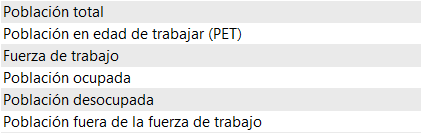

Este documento se encuetra en el siguiente link:

https://www.dane.gov.co/files/operaciones/GEIH/anex-GEIH-mar2024.xlsx



---

**Nota aclaratoria uso de factor de expansión:**

Cada una de las bases contiene un campo con el nombre "fex_c18" el cual almacena  el factor de expansión mensual de cada registro. Este factor de expansión indica el número de personas que representa el entrevistado en la población.

El factor de expansión (fex_c18) se modifica de acuerdo con la información que se necesite:
*   Datos mensuales no se deben hacer cambios (el factor es mensual).
*   Datos trimestrales se debe dividir en 3.
*   Datos semestrales se divide en 6.
*   Información anual se divide en 12.
---



In [30]:
# Definimos las variables que queremos utilizar de mercado laboral
variables_ml = ['pt', 'pet', 'ft', 'oci', 'dsi', 'fft']

# Creamos un diccionario para almacenar los resultados redondeados de cada variable
results_ml_dict = {}

# Calculamos el resultado para cada variable, lo redondeamos y lo almacenamos en el diccionario
for variable in variables_ml:
    test = (data[variable] * data['fex_c18']).sum() / 1000
    rounded_test = round(test)  # Redondeamos el resultado a 2 decimales
    results_ml_dict[variable] = rounded_test

# Convertimos el diccionario en un DataFrame
results_ml_df = pd.DataFrame.from_dict(results_ml_dict, orient='index', columns=['Result'])

# Mostramos el diccionario con los resultados
results_ml_df.head()

,Result
pt,51400
pet,39954
ft,25526
oci,22645
dsi,2881


## **3. Pequeña limpieza de datos.**


Mirando la columna relacionada con las variable de sexo.

**Consideraciones de la variable p3271:**


---


La pregunta asociada es: ¿Cuál fue su sexo al nacer?
Las categorías de los valores son:

    1 Masculino
    2 Femenino

In [37]:
# Obtener la frecuencia de los valores y el tipo de datos de la columna
frecuencia_valores = data['p3271'].value_counts()

# Mostrar la frecuencia de los valores
print("Frecuencia de los valores de la columna:")
print(frecuencia_valores)

Frecuencia de los valores de la columna:
p3271
2    37854
1    32865
Name: count, dtype: int64


In [38]:
# Renombrando columna asociada a p3271 en el DataFrame
data.rename(columns={'p3271': 'sexo'}, inplace=True)

In [58]:
# Comprobando el cambio de nombre de la columna
print(f"¿La columna 'sexo' se encuentra en el dataframe? = {'sexo' in data.columns}")
print(f"¿La columna 'p3271' se encuentra en el dataframe? = {'p3271' in data.columns}")


¿La columna 'sexo' se encuentra en el dataframe? = True
¿La columna 'p3271' se encuentra en el dataframe? = False


In [62]:
# Veamos una parte de la columna
data.iloc[:10][["sexo"]]


,sexo
0,1
1,2
2,1
3,1
4,2
5,1
6,2
7,2
8,1
9,2



**Ejercicio:**


---


Con base en los que hemos hecho con la variable de sexo, haz este proceso con la variable "p6040" que es la variable asociada a la pregunta ¿Cuántos años cumplidos tiene … ?


---

*Pistas:*
1. Utiliza el método value_counts() para obtener la frecuencia de los valores de la columna 'respuesta'.
2. Renombra la columna p6040, por edad.




## **Creación de variables**

Crearemos las variables relacionadas con demanda de cuidado.

In [64]:
# Personas menores a 5 años
data.loc[:,"primera_infancia"] = data["p6040"].apply(lambda x : 1 if x <= 5 else 0)
# Verificamos si la variable esta bien construida
data[data["primera_infancia"]==1][["p6040","primera_infancia"]]


In [75]:
# Personas en condicion de discapacidad: Limitaciones en el movimiento corporal
data.loc[:,"no_mov_corp"] = data["p1906s4"].apply(lambda x : 1 if (x == 1 or x==2)  else 0)
data[data["no_mov_corp"]==1][["p1906s4","no_mov_corp"]]


,p1906s4,no_mov_corp
73,2,1
80,2,1
86,2,1
90,2,1
143,2,1
...,...,...
70445,2,1
70484,2,1
70563,2,1
70564,2,1


In [77]:
# Personas en el sector de cuidado  : cuidado directo-servicio
data.loc[:,"cuidado_grp_det"] = data["rama4d_r4"].apply(
    lambda x : 1 if (
        x==8512 or x==8513 or x==8720 or x==8730 or x==8810)  else 0)

data[data["cuidado_grp_det"]==1][["rama4d_r4","cuidado_grp_det"]]

,rama4d_r4,cuidado_grp_det
689,8730.0,1
4066,8512.0,1
4299,8512.0,1
4376,8810.0,1
5014,8730.0,1
...,...,...
68327,8810.0,1
68968,8730.0,1
68969,8730.0,1
70025,8512.0,1


Crearemos las variables relacionadas con oferta de cuidado.

In [105]:
servicios_area = data[data["cuidado_grp_det"]==1][["area","rama4d_r4","cuidado_grp_det","fex_c18"]]
servicios_area.loc[:,"cuidado_grp_det_fex"] = servicios_area["cuidado_grp_det"] * servicios_area["fex_c18"]
#servicios_area.groupby("rama4d_r4")
servicios_area.groupby(["area"], as_index = False)[["cuidado_grp_det_fex"]].sum()

,area,cuidado_grp_det_fex
0,5.0,7696.369831
1,8.0,1737.096749
2,11.0,2031.898960
3,13.0,1337.966851
4,15.0,402.543048
5,17.0,369.208854
6,18.0,62.004689
7,19.0,1379.035088
8,20.0,868.924898
9,23.0,229.855088


In [76]:
1# Tiempo de cuidado de personas enfermas o en condicion de discapacidad o adultos mayores en el hogar

data.loc[:,"no_mov_corp"] = data["p1906s4"].apply(lambda x : 1 if (x == 1 or x==2)  else 0)
data[data["no_mov_corp"]==1][["p1906s4","no_mov_corp"]]


0        4542.0
1        4761.0
2           NaN
3        8553.0
4           NaN
          ...  
70714       NaN
70715    9700.0
70716       NaN
70717       NaN
70718       NaN
Name: rama4d_r4, Length: 70719, dtype: float64

In [89]:
data["p3081s1"] # si se cuida es 1 si no es 2


0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
70714    2.0
70715    2.0
70716    NaN
70717    NaN
70718    NaN
Name: p3081s1, Length: 70719, dtype: float64

In [84]:
data["p3081s1a1"].unique() #dias de la semana

array([nan,  7.,  5.,  6.,  2.,  3.,  1.,  4.])

In [85]:
data["p3081s1a2"].unique() # Horas por dia

array([nan, 12.,  8., 10.,  2.,  1.,  4.,  3.,  6.,  5., 15., 16., 24.,
       14.,  7., 20.,  9., 18., 17., 13.])

In [92]:
data["horas_semana_cuid_may"] = data.apply(lambda x : x["p3081s1a1"]*x["p3081s1a2"] if (x["p3081s1"] == 1)  else 0 , axis = 1)
data[data["horas_semana_cuid_may"]!=0][["p3081s1a1","p3081s1a2","p3081s1","horas_semana_cuid_may"]]

,p3081s1a1,p3081s1a2,p3081s1,horas_semana_cuid_may
72,7.0,12.0,1.0,84.0
79,7.0,8.0,1.0,56.0
83,7.0,10.0,1.0,70.0
382,7.0,2.0,1.0,14.0
468,5.0,1.0,1.0,5.0
...,...,...,...,...
70292,7.0,5.0,1.0,35.0
70293,7.0,6.0,1.0,42.0
70479,3.0,1.0,1.0,3.0
70507,7.0,2.0,1.0,14.0
